In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-14 14:04:49.767814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 14:04:49.992348: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-14 14:04:50.006954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-14 14:04:50.006995: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0
2023-05-14 14:04:52
14:04:52


In [111]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,54914.0,727424.8,0.0,42991.2,100.0,182.8,182.8,182.9,182.3,182.4
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,47587.6,725717.6,0.0,37337.2,100.0,131.1,131.1,131.0,131.1,131.1
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,42023.2,724221.6,0.0,34854.0,100.0,235.0,235.0,235.0,235.0,235.1
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,38244.0,723113.6,0.0,28973.2,100.0,264.9,264.9,284.9,264.9,285.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,39842.8,724387.2,0.0,28122.8,100.0,259.4,259.4,260.1,259.4,260.2


In [113]:
df.tail(3)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
221,192.168.0.170,20:59:35,20:59:3,117.32065,99.209500,8,0.2,5.6,72.2,9.5,...,47884.4,750553.6,0.0,36710.0,100.0,1.7,1.7,1.9,1.7,1.9
222,192.168.0.170,20:59:46,20:59:4,388.72090,328.960000,7,0.2,7.2,66.2,12.2,...,34832.0,750834.8,0.0,36678.4,100.0,3.0,3.0,3.0,3.0,3.0
223,192.168.0.170,21:01:54,21:01:5,670.45220,419.907333,5,0.3,6.4,67.2,10.9,...,45022.4,751852.4,0.0,39076.8,100.0,3.0,3.0,3.0,3.0,3.0


In [116]:
# csak az utolsó sort akarom megtartani, mert ha fel van tanítva a modell akkor már csak ez kell

last_df = df.iloc[[-1]]

last_df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
223,192.168.0.170,21:01:54,21:01:5,670.4522,419.907333,5,0.3,6.4,67.2,10.9,...,45022.4,751852.4,0.0,39076.8,100.0,3.0,3.0,3.0,3.0,3.0


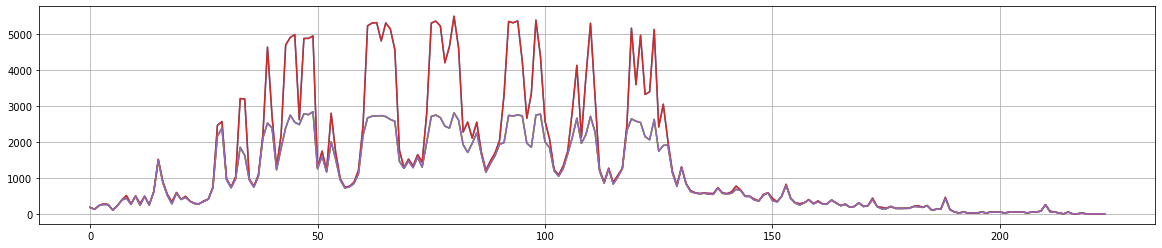

In [4]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

In [5]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

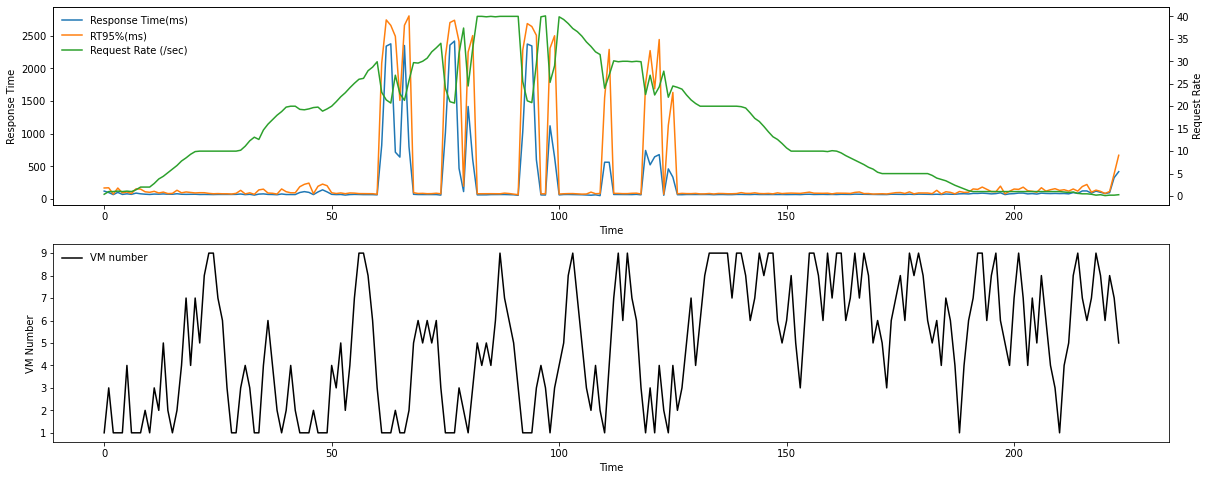

In [8]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [9]:
# -----------------------------------------------

# New, jó ezt használom

mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,100.0,182.8,182.8,182.9,182.3,182.4,1,NaN,3.0,2.0
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,100.0,131.1,131.1,131.0,131.1,131.1,3,1.0,1.0,-2.0
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,100.0,235.0,235.0,235.0,235.0,235.1,1,3.0,1.0,0.0
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,100.0,264.9,264.9,284.9,264.9,285.0,1,1.0,1.0,0.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,100.0,259.4,259.4,260.1,259.4,260.2,1,1.0,4.0,3.0


In [10]:
mf['delta_vm'].unique()

array([ 2., -2.,  0.,  3., -3.,  1., -1., nan])

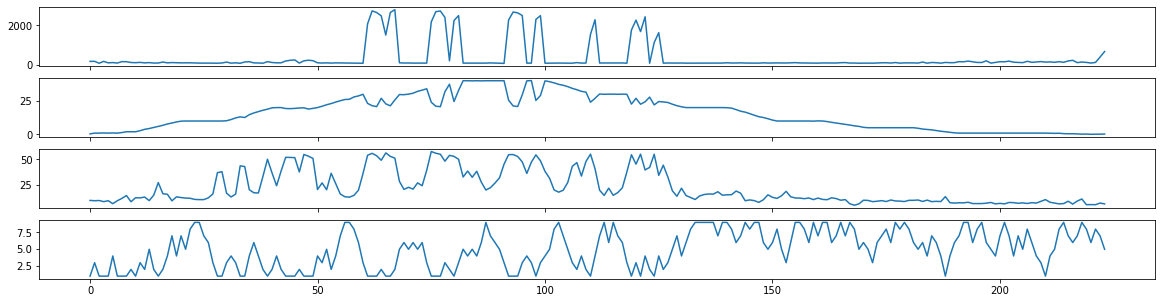

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])
plt.show()

In [12]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [13]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()


In [16]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

In [17]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.show()


In [18]:
from sklearn.linear_model import LinearRegression

def create_model_for_metric(columnname: str, short=False, binwidth=3.0):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    print(__metric_term.shape, __metric_next.shape)

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    if short == True:
        print('score  =', __fit_score)
        print('coef   =', __fit_coef_)
        print('intcpt =', __fit_intercept_)

        print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    if short == False:
        plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)
    
    plot_true_vs_pred_hist_conf(f1[__next_name].values, __pred_metric, binwidth)


In [19]:
# Ezek itt a delta_metric_pred, delta_metric_true pred plottok

# Az lr álltal a metrika pred after scaling vs metrika true after scaling értékeket vetik össze.

# True vs Pred

# ------------

# Viszont a score, coef, intercpt értékek a modellből vannak számolva

# Viszont a slope, r2, r, mse viszot a becslés jóságát nézik (pred vs true)

(194, 2) (194,)
score  = 0.8891952695428373
coef   = [0.87016971 0.58266153]
intcpt = 1.8585627908563147

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


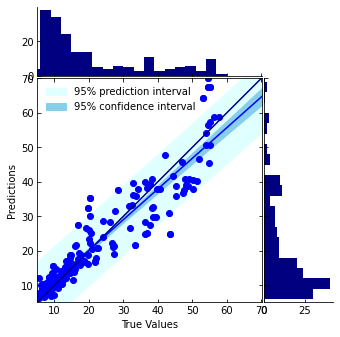

In [20]:
create_model_for_metric('CPU0User%', short=True)

(194, 2) (194,)
score  = 0.6855208987373714
coef   = [0.81839626 0.98981005]
intcpt = 11.573752182180385

slope 0.69 int 16.38
r2 0.69
r  0.83
mse 154.14


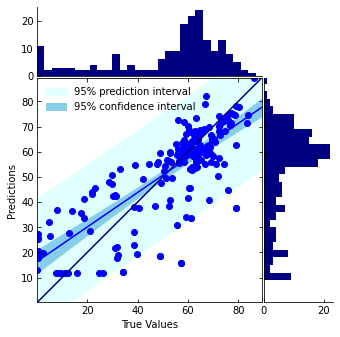

In [21]:
create_model_for_metric('CPU0Idle%', short=True)

(194, 2) (194,)
score  = 0.7335595636002967
coef   = [0.84706443 0.91930659]
intcpt = 13.845818401888309

slope 0.73 int 22.57
r2 0.73
r  0.86
mse 1471.75


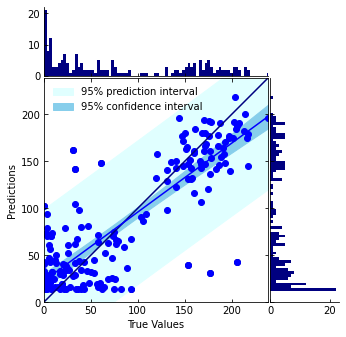

In [22]:
create_model_for_metric('[DSK:sda]RMerge', short=True)

In [23]:
from sklearn.linear_model import LinearRegression

def get_all(columnname: str, short=True):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    
    s = (__metric_term.shape, __metric_next.shape)
    

    lr = LinearRegression(fit_intercept=True)
    rr = lr.fit(__metric_term, __metric_next)
    rr.score(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_

    __pred_metric = rr.predict(__metric_term)

    if short == False:
        print('score  =', __fit_score)
        print('coef   =', __fit_coef_)
        print('intcpt =', __fit_intercept_)

        print()
    
#--------------------

    true = f1[__next_name].values
    pred = __pred_metric

    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...

    if short == False:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)

    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if short == False:
    
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))

    return {'f1.shape': s,
            'score_or': __fit_score,
            'coef_or': __fit_coef_,
            'intercept_or': __fit_intercept_,
            'slope_tp': slope,
            'intercept_tp': intercept,
            'r2': r2,
            'r': r,
            'mse': mse}

In [24]:
get_all('CPU0Total%')

{'f1.shape': ((194, 2), (194,)),
 'score_or': 0.9000095691719929,
 'coef_or': array([0.87125765, 0.57701614]),
 'intercept_or': 3.239872776265514,
 'slope_tp': 0.9000095691719932,
 'intercept_tp': 3.799739454382645,
 'r2': 0.9000095691719927,
 'r': 0.9486883414335778,
 'mse': 77.15242046307432}

In [25]:
# Fentinek meg az alábbinak azonosnak kell lennie -> ez csak egy ellenőrzés

(194, 2) (194,)
score  = 0.9000095691719929
coef   = [0.87125765 0.57701614]
intcpt = 3.239872776265514

slope 0.90 int 3.80
r2 0.90
r  0.95
mse 77.15


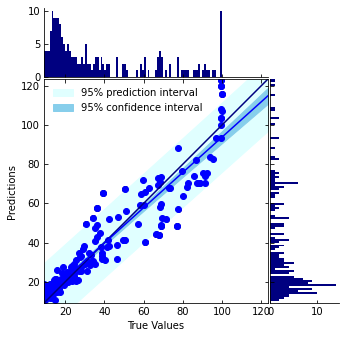

In [26]:
create_model_for_metric('CPU0Total%', short=True, binwidth=1.0)

In [27]:
print(colored('---------------------------------------', 'yellow'))
print(colored('---------------------------------------', 'red'))
print(colored('---------------------------------------', 'blue'))
print(colored('---------------------------------------', 'green'))
print(colored('---------------------------------------', 'magenta'))
print(colored('---------------------------------------', 'cyan'))

print(colored('--------------', color='red', on_color='on_grey'))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'reverse']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
--------------
--------------
--------------
--------------


In [28]:
def get_terms_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [29]:
import statsmodels.api as sm

__metric_term, __metric_next, f1 = get_terms_for_metric('CPU0Total%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')
print(colored('------------------------------------------------------------------------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))


<class 'pandas.core.frame.DataFrame'> (194, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 14 May 2023   Prob (F-statistic):           3.13e-96
Time:                        14:11:58   Log-Likelihood:                -696.82
No. Observations:                 194   AIC:                             1400.
Df Residuals:                     191   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

# Ez itt most egy kisérleti szakasz

valamit vizsgálok utána pedig törölöm.

In [30]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [31]:
cn = mf.columns[4:-4]

In [32]:


# Ugyan ez az original modell alapján (nincs közöttük interakció)



In [33]:
def get_terms_for_metric_with_extra(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = extra + '_term1'
    __metric_term4 = extra + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

    f1[__metric_term3] = f1[extra] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term4] = f1[extra] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [34]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Origina wit Extra ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_extra('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [35]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [36]:


# Ugyanez az original modellel (de még az interakciót is hozzáadom)



In [37]:
def get_terms_for_metric_with_extra_and_interaction(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = extra + '_term1'
    __metric_term4 = extra + '_term2'
    __metric_term5 = columnname + '_' + extra
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

    f1[__metric_term3] = f1[extra] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term4] = f1[extra] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    f1[__metric_term5] = f1[columnname] * f1[extra]
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4, __metric_term5]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [38]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Origina wit Extra ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [39]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [40]:
__metric_term.columns

Index(['CPU0Total%_term1', 'CPU0Total%_term2'], dtype='object')

In [41]:


# Ezt azért hagyom itt mert lehet, hogy egyszer az sm.OLS segítségével fogom becsülni az LR-t
# és akkor itt van összerakva, hogyan lehet abból a modelből kszámolni a predicted értéket


In [97]:

# Megfigyelés

# Nem igazán segít ha hozzáadok a modellhez egy egy változót


In [42]:


# Tényleg csak kiviből, mi van ha az összeset hozzáadom



In [43]:
names = [
    'CPU0User%', 'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads',
    '[DSK:sda]RMerge', '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
    '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
    '[DSK:sda]Request', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
    '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
    '[NUMA:0]Anon', '[NUMA:0]Inactive', '[TCPD]InReceives', '[TCPD]InDelivers',
    '[TCPD]OutRequests', '[TCPD]InSegs', '[TCPD]OutSegs'
]

In [44]:
def get_terms_for_metric_with_all(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __terms = []
    
    __terms.append(__metric_term1)
    __terms.append(__metric_term2)
    
    for name in names:
        __metric_term_a = name + 'term1'
        __metric_term_b = name + 'term2'
        __metric_term_c = name + 'term3'
        
        f1[__metric_term_a] = f1[name] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
        f1[__metric_term_b] = f1[name] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
        f1[__metric_term_c] = f1[columnname] * f1[name]
    
        __terms.append(__metric_term_a)
        __terms.append(__metric_term_b)
        __terms.append(__metric_term_c)
    
    # __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4, __metric_term5]]
    __metric_term = f1[__terms]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [45]:

def tmp(metric):

    metric = metric
    metric_next = metric + 'Next'

    bins = 10000.0

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original with All and interaction')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)

In [103]:
interact(tmp, metric=cn);

interactive(children=(Dropdown(description='metric', options=('response_time', 'worker_number', 'request_rate'…

In [ ]:


# A tanulság

# Ha mindegyiket mellé veszem akkor egyes változókat fel lehet hozni,
# Néhányat ami jó még jobbá tenni

# Kérdés persze, hogy mükdöik-e ez az életben, de az LR becslésük, hogy hova kerülnek
# egy felskálázás után az biztosan javul



## Kísérleti szakasz vége

Végeztem azzal amit meg akartam vizsgálni.

In [46]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
# így ilyen sorrendben szerepelnek a metrikák a metric_log filében

In [ ]:
worker_give_metrics
write_to_csv_time
time
response_time_p95
response_time
worker_number
request_rate
CPU0User%
CPU0Idle%
CPU0Total%
[DSK:sda]Reads
[DSK:sda]RMerge
[DSK:sda]RKBytes
[DSK:sda]WaitR
[DSK:sda]Writes
[DSK:sda]WMerge
[DSK:sda]WKBytes
[DSK:sda]WaitW
[DSK:sda]Request
[DSK:sda]QueLen
[DSK:sda]Wait
[DSK:sda]SvcTim
[DSK:sda]Util
[NUMA:0]Used
[NUMA:0]Free
[NUMA:0]Slab
[NUMA:0]Mapped
[NUMA:0]Anon
[NUMA:0]AnonH
[NUMA:0]Inactive
[NUMA:0]Hits
[TCPD]InReceives
[TCPD]InDeliversm
[TCPD]OutRequests
[TCPD]InSegs
[TCPD]OutSegs

In [250]:
# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']
# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# Korábban peig azt láttam, hogy ezek vannak jó linearitásban a delta_vm-el
# Amik a korábbi elemzések alapján szóba jöhet
input_variables = ['request_rate',
                   'CPU0User%',
                   'CPU0Total%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RKBytes',
                   '[NUMA:0]Free',
                   '[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[TCPD]OutSegs']

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']
# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb

# train_labels = mf[['response_time_p95']]
train_features = mf[input_variables]
train_labels = mf[['response_time']]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                    loss='mean_absolute_error')

[[  15.72   22.25 1475.04]]
First example: [[  0.4   9.8 182.4]]
Normalized   : [[-1.25 -0.77 -0.77]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 3)                7         
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 30)                120       
                                                                 
 dense_13 (Dense)            (None, 15)                465       
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 608
Trainable params: 601
Non-trainable params: 7
_________________________________________________________________


In [100]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

2023-05-14 15:17:00.107329: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:17:00.143461: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:17:00.182952: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:17:00.219836: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


CPU times: user 1min 12s, sys: 2.53 s, total: 1min 14s
Wall time: 1min 11s


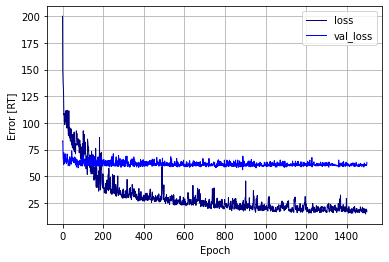

In [101]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

In [255]:
predicted_labels = first_model.predict(train_features)

7/7 [==============================] - 0s 2ms/step


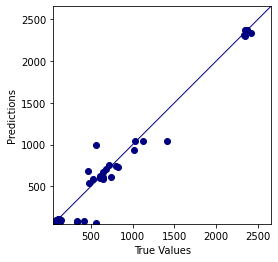

In [256]:
plot_true_vs_pred(train_labels.values, predicted_labels)

In [251]:
# Save

# Kiexportálni az itt feltanított model.

first_model.save(os.getcwd())

# first_model.save('model.h5')

# ------------------------------------------

# Load

model = keras.models.load_model(os.getcwd())

# Let's check:
np.testing.assert_allclose(
    first_model.predict(_new_train_features), model.predict(_new_train_features)
)


1/1 [==============================] - 0s 68ms/step


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 80.61542
Max relative difference: 0.99514467
 x: array([[0.393326]], dtype=float32)
 y: array([[81.00874]], dtype=float32)

In [257]:
last_df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
223,192.168.0.170,21:01:54,21:01:5,670.4522,419.907333,5,0.3,6.4,67.2,10.9,...,45022.4,751852.4,0.0,39076.8,100.0,3.0,3.0,3.0,3.0,3.0


In [258]:
train_features.shape

(224, 3)

In [269]:
def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

In [299]:
# Megvan a kibaszott modell

# Meg van a df-ből kiolvasott utlsó sor

# Csináljunk erre egy becslsét

# csak ezek kellenek a last_df-ből

c_rt = last_df['response_time']
current_worker_number = last_df['worker_number']

wcsv = last_df['write_to_csv_time']
tper = last_df['time']

train_features = last_df[input_variables]
train_features.head()

predicted_labels = first_model.predict(train_features)

# most jön az, hogy minden actionre ki kell számolni az értéket

# meg kell nézni, hogy mi az aktuális worker szám

# w = 3
w = current_worker_number.values[0]
print(w)

# ez alapján meghatározni, hogy milyen actionokat vehet végig (pl.w = 3 esetén [-2, -1, ,5, 6])

MIN_VM = 1
MAX_VM = 9

MAX = MAX_VM - w + 1
MIN = MIN_VM - w

A = [x for x in range(MIN, MAX)]
print(A)

# ezt tovább lehet fokozni, hogy csak föl és csak le
scale = 'IN'
if scale == 'OUT':
    A = [x for x in range(1, MAX)]
if scale == 'IN':
    A = [x for x in range(MIN, 0)]
print(A)

# most minden lehetséges A-hoz kiszámolni a metrikákat
# elárolni őket egy tömbben s utólag kiértékelni

print(input_df)

print('-----------------------------------------')
print('train_features -> vagyis a current metrics     ')
with np.printoptions(precision=2, suppress=True):
    print(train_features)
print(colored('c_rt                  -> \t' + str(c_rt), 'red'))
print(colored('current_worker_number -> \t' + str(current_worker_number), 'red'))
print('-----------------------------------------')
print(input_variables)
print('-----------------------------------------')



# Pandas.Series -> nd.array
train_features = train_features.values
train_features = train_features[0]
print('train_features ......', train_features)

# aps ebbe pakolom az [a, __predicted_response_time] értékeket
aps = []

for a in A:
    # 0.
    # inicializálni egy üres tömböt az input_variable változónak
    _new_train_features = np.zeros((1, train_features.shape[0]))
    
    # 1.
    # minden metrikára kiszámolni
    for i, metric in enumerate(input_variables):
        # print(i, metric)
        if metric != 'worker_number':
            
            # Systematicly load
            f = './lr/'
            # file name, I'm using *.pickle as a file extension
            filename = f + str(metric) + '.pickle'
            # load model
            __lr_model = pickle.load(open(filename, "rb"))
            # print(__lr_model.coef_, __lr_model.intercept_)
            
            
            feature = train_features[i]
            

            # 3.
            # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
            __metric_term = create_term_for_prediction(feature, current_worker_number, a)

            
            # print('---a metrica értékének becsése (value, w, k alapján ---')
            __metric_term  = np.squeeze(__metric_term, -1)

            __pred_metric = __lr_model.predict(__metric_term)

            # 4.
            # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
            _new_train_features[0, i] = __pred_metric

   
    # 5.
    # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
    with np.printoptions(precision=2, suppress=True):
        print(_new_train_features)

    # 6.
    # a neurális háló model segítségével megbecsülöm a válaszidőt

    __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)

    with np.printoptions(precision=2, suppress=True):
        print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')
    
    aps.append([a, __predicted_response_time.flatten()[0]])

# Keressük meg hol a legjobb a becslés
# fps = pd.DataFrame(aps, columns=['delta_vm', 'pred_rt'])
# fps

# Kerresük meg hoa legjobb a becslés
UPPER_LIMIT = 90
LOWER_LIMIT = 30

chosen_delta_vm_out = 19
chosen_delta_vm_in  = -20

chosen_delta_vm = None

# scale out (felfelés skálázás)
if scale == 'OUT':
    print('SCALE OUT')
    for row in aps:
        print(row)
        print(row[1])
        if row[1] < UPPER_LIMIT:
            chosen_delta_vm_out = row[0]
            print(chosen_delta_vm_out)
            break
    chosen_delta_vm = chosen_delta_vm_out
# scale in (lefelés skálázás)
if scale == 'IN':
    print('SCALE IN')
    for row in aps:
        print(row)
        print(row[1])
        if row[1]  < UPPER_LIMIT:
            chosen_delta_vm_in = row[0]
            print(chosen_delta_vm_in)
            break
    chosen_delta_vm = chosen_delta_vm_in

print('chosen_delta_vm_out =', chosen_delta_vm_out)
print('chosen_delta_vm_in  =', chosen_delta_vm_in)
print('chosen_delta_vm     =', chosen_delta_vm)

# újra tesztelni különöböző értékekkel

1/1 [==============================] - 0s 41ms/step
5
[-4, -3, -2, -1, 0, 1, 2, 3, 4]
[-4, -3, -2, -1]
     request_rate  CPU0User%  [TCPD]OutSegs
223           0.3        6.4            3.0
-----------------------------------------
train_features -> vagyis a current metrics     
     request_rate  CPU0User%  [TCPD]OutSegs
223           0.3        6.4            3.0
c_rt                  -> 	223    419.907333
Name: response_time, dtype: float64
current_worker_number -> 	223    5
Name: worker_number, dtype: int64
-----------------------------------------
['request_rate', 'CPU0User%', '[TCPD]OutSegs']
-----------------------------------------
train_features ...... [0.3 6.4 3. ]
[[  0.32  14.79 104.6 ]]
action =  -4  --> rt -->  [[95.96]] 

[[  0.42  10.19 101.17]]
action =  -3  --> rt -->  [[87.19]] 

[[  0.46   8.65 100.03]]
action =  -2  --> rt -->  [[83.81]] 

[[ 0.47  7.89 99.46]]
action =  -1  --> rt -->  [[82.54]] 

SCALE IN
[-4, 95.95502]
95.95502
[-3, 87.19397]
87.19397
-3
chosen

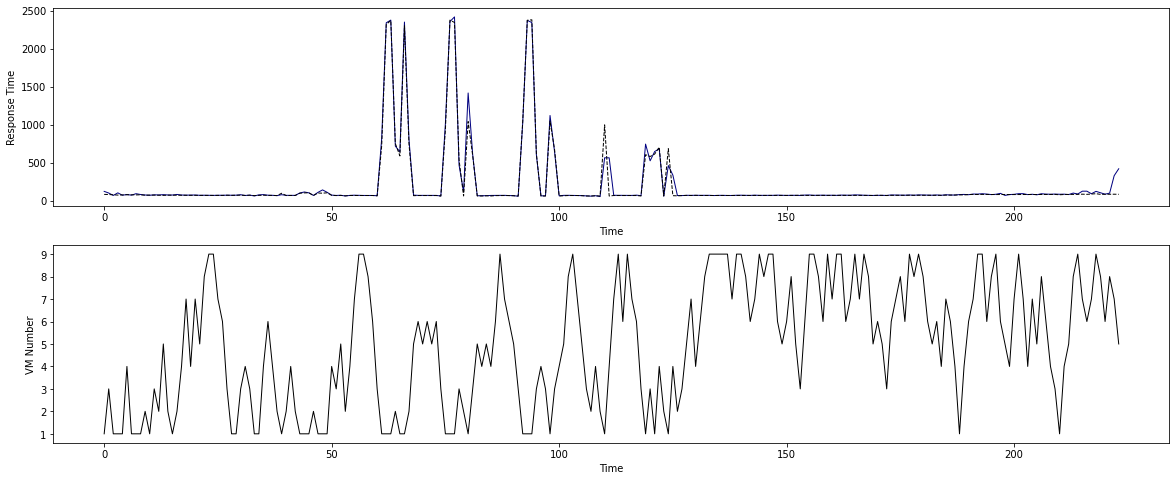

In [104]:
def plot_timeseries(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(mf['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(mf['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

plot_timeseries(train_labels.values, predicted_labels)

In [105]:
print(input_variables)

['request_rate', 'CPU0User%', '[TCPD]OutSegs']


# LR modell megcsinálló

Minden metrikára megcsináljuk a tanítás és az LR modelleket elmenjük.

https://mljar.com/blog/save-load-scikit-learn-model

In [200]:
import pickle
import os

os.system('rm -rf ./lr')
os.system('mkdir ./lr')
f = './lr/'

for i, metric in enumerate(input_variables):
    # megcsinálni a linreg modelt az adott metrikára (tanítás)
    __metric_term, __metric_next = create_term_for_metric(metric)
    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
    print(type(__lr_model))
    print(__lr_model.coef_)
    print('-------------------------------------------------------------------')
    print(__metric_term.shape)

    # file name, I'm using *.pickle as a file extension
    filename = f + str(metric) + '.pickle'

    # save model
    pickle.dump(__lr_model, open(filename, "wb"))

    # load model
    loaded_model = pickle.load(open(filename, "rb"))

    print(loaded_model.coef_)

<class 'sklearn.linear_model._base.LinearRegression'>
[1.02434361 1.15767578]
-------------------------------------------------------------------
(194, 2)
[1.02434361 1.15767578]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.87016971 0.58266153]
-------------------------------------------------------------------
(194, 2)
[0.87016971 0.58266153]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.88660233 0.42923089]
-------------------------------------------------------------------
(194, 2)
[0.88660233 0.42923089]


In [186]:
# Systematicly load

import pickle
import os

f = './lr/'

for i, metric in enumerate(input_variables):

    # file name, I'm using *.pickle as a file extension
    filename = f + str(metric) + '.pickle'
    
    # load model
    loaded_model = pickle.load(open(filename, "rb"))

    print(loaded_model.coef_)

[1.02434361 1.15767578]
[0.87016971 0.58266153]
[0.88660233 0.42923089]


# LR csináló vége

# Helper függvik

In [106]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next



def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr
    
    

# A -> pred RT

In [224]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
r = []
al = []
rl = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = 223

__current_response_time = mf['response_time'].values[__N]
__last_metrics = mf[input_variables].values[__N]
__w = mf['worker_number'].values[__N]

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')
print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')


[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[0.3 6.4 3. ]
__current_rt -> 	419.9073333333333
__w -> worker_number 	5
-----------------------------------------
['request_rate', 'CPU0User%', '[TCPD]OutSegs']
-----------------------------------------
[[ 0.62  0.99 94.31]]
action =  -7  --> rt -->  [[72.96]] 

[[ 0.72 -3.61 90.88]]
action =  -6  --> rt -->  [[68.94]] 

[[  0.32  14.79 104.6 ]]
action =  -4  --> rt -->  [[95.96]] 

[[  0.42  10.19 101.17]]
action =  -3  --> rt -->  [[87.19]] 

[[  0.46   8.65 100.03]]
action =  -2  --> rt -->  [[83.81]] 

[[ 0.47  7.89 99.46]]
action =  -1  --> rt -->  [[82.54]] 

[[ 0.48  7.43 99.12]]
action =  0  --> rt -->  [[81.92]] 

[[ 0.49  7.12 98.89]]
action =  1  --> rt -->  [[81.55]] 

[[ 0.5   6.9  98.72]]
action =  2  --> rt -->  [[81.31]] 

[[ 0.5   6.74 98.6 ]]
action =  3  --> rt -->  [[81.14]] 

[[ 0.5   6.61 98.51]]
action =  4  --> rt -->  [[81.01

INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train15/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train15/assets


1/1 [==============================] - 0s 69ms/step


In [85]:

def moric(__n, debug=False):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    results = []
    results_dict = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time_p95'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]
    
    if debug == True:
        print('RT = ', __current_response_time)
        print('w  = ', __w)
        with np.printoptions(precision=2, suppress=True):
            print(__last_metrics)

    for a in A:

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            _ = time.time()
            __predicted_response_time = first_model.predict(_new_train_features, verbose = 0, batch_size=10, use_multiprocessing=True)
            # print(time.time()-_)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    return results


In [86]:
len(mf)

224

In [87]:
a_prts = []
# for i in mf.shape[0]:
for i in track(range(len(mf))):
    _ = moric(i)
    a_prts.append(_)
    

Output()

2023-05-14 15:06:45.676099: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:07:00.148762: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:07:05.212583: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:07:39.634575: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:08:00.144800: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:08:32.685683: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:09:00.225804: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-14 15:09:27.541836: W tensorflow/core/data/root_dataset.cc:26

In [88]:
len(a_prts)

224

In [89]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

a

{18}

In [94]:
# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)


a = np.array(a_prts[0:50])
print(a.shape)


(224, 18)
(50, 18)


In [95]:
# Ha csak bizonyos típusú actionoket akarok (pl. 0, 1, .., 5)

a = a[:,6:]
print(a.shape)

(50, 12)


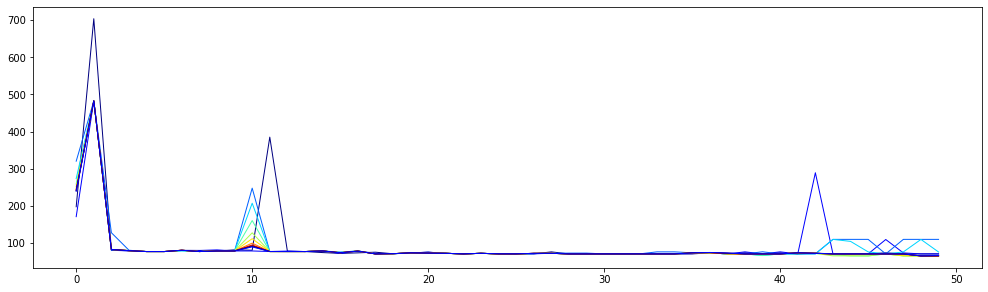

In [96]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1
#mpl.rcParams['lines.linestyle'] = '-'
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.figure(figsize=(17, 4.8))
plt.plot(a)
plt.show()

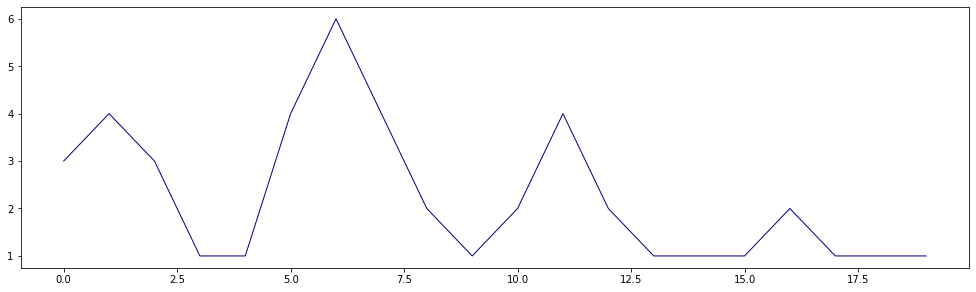

In [97]:
plt.figure(figsize=(17, 4.8))
plt.plot(mf['worker_number'].values[30:50])
plt.show()

In [98]:

# Amit egyszerűen nehezen tudok a mai agyammal felfogni, hogy van az, hogy vannak olyan pontok az idősorban
# amikor tök mindegy hány új vm-et adnék hozzá azt mondja hogy mindíg ugyan az lenne a várható válaszidő.

# Hogy a pékbe van ez?
# Mi miatt van ez így?
# A linreg nem teszi adott helyen a megfellő helyre az új metrika értéket?
# Vagy a neurális háló?

# A fenti est kitűnő példa erre.

# Például a 40-ik eset pont ilyen.

# ---> 

# Lehet, hogy ez olyan helyeken fordul elő, ahol a current worker number maximumon van.

moric(40)

moric(40, debug=True)

RT =  113.3854499999997
w  =  2
[   19.8    36.8    67.6     9.9   272.5 73968.8 89443.2 49031.2  2732.9]
[[   23.85    20.28    36.56    22.95   742.35 72756.08 89302.03 47021.15
    912.37]]
[[   23.98    19.77    35.62    22.99   743.46 72711.73 89301.23 47033.59
    852.85]]
[[   24.15    19.07    34.29    23.03   745.   72649.64 89300.11 47051.01
    769.52]]
[[   24.42    18.01    32.3     23.1    747.31 72556.51 89298.44 47077.14
    644.53]]
[[   24.86    16.25    28.99    23.22   751.17 72401.28 89295.65 47120.68
    436.2 ]]
[[   25.74    12.72    22.36    23.46   758.89 72090.83 89290.07 47207.77
     19.55]]
[[   28.38     2.14     2.46    24.16   782.05 71159.47 89273.33 47469.04
  -1230.4 ]]
[[   17.82    44.46    82.03    21.35   689.42 74884.9  89340.28 46423.96
   3769.4 ]]
[[   20.46    33.88    62.14    22.05   712.58 73953.54 89323.55 46685.23
   2519.45]]
[[   21.34    30.35    55.51    22.29   720.3  73643.09 89317.97 46772.32
   2102.8 ]]
[[   21.78    28.59    5

[70.56792,
 70.56792,
 70.56792,
 70.567924,
 70.68156,
 73.45728,
 73.45728,
 76.08806,
 70.567856,
 70.56792,
 70.56792,
 70.56792,
 70.56792,
 70.56792,
 70.56792,
 70.56792,
 70.56792,
 70.56792]